Nama    : Dea Putri Nastiti

NIM     : 2241720117

Kelas   : TI-3E

# PRAKTIKUM 1



**Klasifikasi Iris dengan Perceptron**

**Deskripsi**

Pada pratikum ini, Anda diminta untuk melakukan klasifikasi bunga iris dengan menggunakan model Perceptron. Anda dapat menggunakan dataset iris pada praktikum sebelumnya.

Untuk nembah pemahaman Anda terkait dengan model Perceptron, pada pratkikum ini Anda akan membuat model Perceptron tanpa menggunakan library.

**Langkah 1 - Import Library**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

- import numpy as np: Mengimpor library NumPy dan memberinya alias np. NumPy digunakan untuk operasi numerik, terutama pada array multidimensi.

- import matplotlib.pyplot as plt: Mengimpor modul pyplot dari library Matplotlib dan memberinya alias plt. Matplotlib digunakan untuk membuat visualisasi data, seperti grafik.

- import pandas as pd: Mengimpor library Pandas dan memberinya alias pd. Pandas digunakan untuk manipulasi dan analisis data, terutama dengan struktur data DataFrame.

- import seaborn as sns: Mengimpor library Seaborn dan memberinya alias sns. Seaborn dibangun di atas Matplotlib dan menyediakan antarmuka tingkat tinggi untuk membuat visualisasi data yang menarik dan informatif.

**Langkah 2 - Load Data dan Visualisasi**

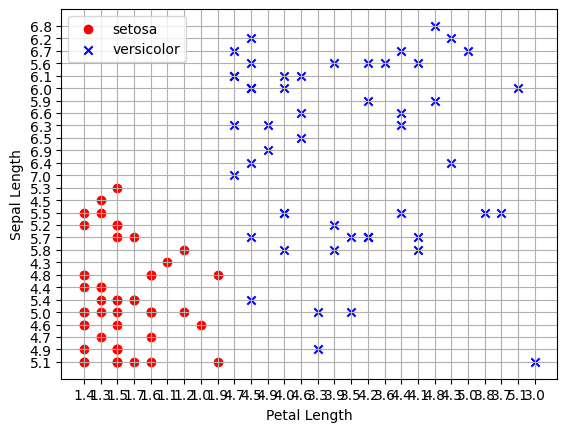

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/machine learning/js9/Iris.csv', header=None)
setosa = df[df[5] == 'Iris-setosa']
versicolor = df[df[5] == 'Iris-versicolor']
virginica = df[df[5] == 'Iris-virginica']

a, b = 3, 1
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

1. df = pd.read_csv('/content/drive/MyDrive/machine learning/js9/Iris.csv', header=None)

  - df = ...: Mendeklarasikan variabel bernama df untuk menyimpan data.
  - pd.read_csv(...): Membaca data dari file CSV menggunakan fungsi read_csv dari library Pandas.
  - header=None: Menandakan bahwa file CSV tidak memiliki baris header, sehingga Pandas akan menganggap baris pertama sebagai data.

2. setosa = df[df[5] == 'Iris-setosa']

  versicolor = df[df[5] == 'Iris-versicolor']

  virginica = df[df[5] == 'Iris-virginica']

  - Baris-baris ini memisahkan data dalam df berdasarkan spesies bunga dan menyimpannya dalam tiga variabel berbeda:
    - setosa: Berisi data untuk spesies 'Iris-setosa'.
    - versicolor: Berisi data untuk spesies 'Iris-versicolor'.
    - virginica: Berisi data untuk spesies 'Iris-virginica'.
  - df[5]: Mengacu pada kolom ke-5 (indeks 5) dalam DataFrame df, yang diasumsikan sebagai kolom yang berisi nama spesies.
  - df[df[5] == 'Iris-setosa']: Memilih baris-baris dalam df di mana nilai pada kolom ke-5 sama dengan 'Iris-setosa'.

3. a, b = 3, 1

  - Mendeklarasikan dua variabel:
    - a: Diinisialisasi dengan nilai 3, kemungkinan mewakili indeks kolom untuk Petal Length.
    - b: Diinisialisasi dengan nilai 1, kemungkinan mewakili indeks kolom untuk Sepal Length.

4. plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

  - Membuat dua scatter plot menggunakan fungsi scatter dari Matplotlib:
    - Plot pertama untuk spesies 'setosa' dengan:
      - setosa[a]: Nilai dari kolom a (Petal Length) sebagai sumbu x.
      - setosa[b]: Nilai dari kolom b (Sepal Length) sebagai sumbu y.
      - color='red': Titik-titik data berwarna merah.
      - marker='o': Titik-titik data berbentuk lingkaran.
      - label='setosa': Memberikan label 'setosa' untuk legenda.
    - Plot kedua untuk spesies 'versicolor' dengan pengaturan yang serupa, tetapi dengan warna biru, marker 'x', dan label 'versicolor'.

5. plt.xlabel('Petal Length')

  plt.ylabel('Sepal Length')

  plt.legend(loc='upper left')

  plt.grid()
  
  plt.show()

  - plt.xlabel(...): Memberi label pada sumbu x dengan 'Petal Length'.
  - plt.ylabel(...): Memberi label pada sumbu y dengan 'Sepal Length'.
  - plt.legend(...): Menampilkan legenda di pojok kiri atas (loc='upper left').
  - plt.grid(): Menampilkan grid pada plot.
  - plt.show(): Menampilkan plot yang telah dibuat.

In [ ]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])  # Initialize weights
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))  # Calculate the update
                self.w_[0] += update  # Update bias
                self.w_[1:] += update * xi  # Update weights
                errors += int(update != 0.0)  # Count misclassifications
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


1. def __init__(self, eta=0.01, n_iter=10):

    self.eta = eta  # Learning rate

    self.n_iter = n_iter  # Number of iterations (epochs)

  - eta: Ini adalah learning rate, yang menentukan seberapa besar perubahan yang diterapkan pada bobot (weights) selama pembaruan. Nilai yang lebih tinggi dapat menyebabkan model belajar dengan cepat, tetapi juga bisa menyebabkan instabilitas, sedangkan nilai yang lebih rendah dapat menghasilkan pembelajaran yang lebih stabil tetapi lambat.
  - n_iter: Ini adalah jumlah iterasi (epoch) di mana model akan dilatih. Dalam setiap iterasi, semua data pelatihan akan diproses sekali.

2. def fit(self, X, y):

    self.w_ = np.zeros(1 + X.shape[1])  # Initialize weights

    self.errors_ = []

  - X: Merupakan fitur (input) dari dataset yang digunakan untuk pelatihan. Ini adalah array 2D di mana setiap baris mewakili satu sampel dan setiap kolom mewakili fitur.
  - y: Merupakan label target (output) yang terkait dengan setiap sampel di X.
  - self.w_: Bobot model diinisialisasi sebagai array nol dengan panjang yang sama dengan jumlah fitur ditambah satu (untuk bias).
  - self.errors_: Ini adalah daftar untuk menyimpan jumlah kesalahan klasifikasi pada setiap iterasi.

3. for _ in range(self.n_iter):
    
    errors = 0
    
    for xi, target in zip(X, y):
    
        update = self.eta * (target - self.predict(xi))  # Calculate the update
    
        self.w_[0] += update  # Update bias
    
        self.w_[1:] += update * xi  # Update weights
    
        errors += int(update != 0.0)  # Count misclassifications
    
    self.errors_.append(errors)

  - Loop Luar: Ini adalah loop utama yang menjalankan pelatihan selama n_iter kali.
  - errors: Variabel untuk menghitung jumlah kesalahan pada iterasi saat ini.
  - Loop Dalam: Untuk setiap sampel (xi, target) dalam dataset:
    - update: Hitung pembaruan berdasarkan perbedaan antara target yang diinginkan dan prediksi model. Jika prediksi tidak sama dengan target, maka bobot akan diperbarui.
    - self.w_[0] += update: Pembaruan untuk bias (intercept).
    - self.w_[1:] += update * xi: Pembaruan untuk bobot fitur. Pembaruan ini dikalikan dengan fitur karena kontribusi setiap fitur berbeda tergantung pada nilainya.
    - errors += int(update != 0.0): Hitung jumlah kesalahan, yaitu jumlah sampel yang tidak diklasifikasikan dengan benar.
  - self.errors_.append(errors): Menyimpan jumlah kesalahan setelah setiap iterasi.

4. def net_input(self, X):
    
    return np.dot(X, self.w_[1:]) + self.w_[0]

  - Metode ini menghitung input bersih untuk neuron. Ini mengalikan input X dengan bobot (kecuali bias) dan menambahkan bias. Fungsi ini akan digunakan untuk menentukan apakah neuron aktif atau tidak.

5. def predict(self, X):
    
    return np.where(self.net_input(X) >= 0.0, 1, -1)
  
  - Metode ini menggunakan input bersih untuk menentukan kelas prediksi. Jika input bersih lebih besar atau sama dengan 0, prediksi adalah 1; jika tidak, prediksi adalah -1. Ini mengimplementasikan langkah aktivasi dari model Perceptron.

In [ ]:
# Siapkan data pelatihan tanpa baris pertama
y = df.iloc[1:101, 5].values  # Ambil dari baris kedua
y = np.where(y == 'Iris-setosa', -1, 1)  # Encode label
X = df.iloc[1:101, [1, 3]].values  # Ambil sepal length dan petal length

1. y = df.iloc[1:101, 5].values:

  - Mengambil data untuk variabel target (y) dari DataFrame df.
  - iloc[1:101, 5]: Memilih baris dari indeks 1 hingga 100 (baris kedua hingga baris ke-101) dan kolom ke-5 (indeks 5), yang berisi nama spesies.
  - .values: Mengubah data yang dipilih menjadi array NumPy.

2. y = np.where(y == 'Iris-setosa', -1, 1):

  - Mengubah label spesies menjadi nilai numerik untuk digunakan dalam model Perceptron.
  - np.where(...): Fungsi NumPy yang mengganti nilai dalam array berdasarkan kondisi.
  - y == 'Iris-setosa': Kondisi untuk memeriksa apakah nilai dalam array y sama dengan 'Iris-setosa'.
  - Jika kondisi terpenuhi (spesies adalah 'Iris-setosa'), nilai diganti dengan -1.
  - Jika kondisi tidak terpenuhi (spesies bukan 'Iris-setosa'), nilai diganti dengan 1.

3. X = df.iloc[1:101, [1, 3]].values:

  - Mengambil data untuk fitur input (X) dari DataFrame df.
  - iloc[1:101, [1, 3]]: Memilih baris dari indeks 1 hingga 100 dan kolom 1 dan 3 (indeks 1 dan 3), yang kemungkinan mewakili Sepal Length dan Petal Length.
  - .values: Mengubah data yang dipilih menjadi array NumPy.

In [ ]:
# Konversi X dan y ke numpy array dengan tipe yang sesuai
X = np.array(X, dtype=float)
y = np.array(y, dtype=int)

# Train the Perceptron
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

1. X = np.array(X, dtype=float):

  - Mengonversi variabel X (fitur input) ke array NumPy dengan tipe data float.
  - Ini memastikan bahwa data fitur input memiliki tipe data yang sesuai untuk perhitungan dalam model Perceptron.

2. y = np.array(y, dtype=int):

  - Mengonversi variabel y (label target) ke array NumPy dengan tipe data int.
  - Ini memastikan bahwa label target memiliki tipe data integer, yang umum digunakan untuk klasifikasi.

3. ppn = Perceptron(eta=0.1, n_iter=10):

  - Membuat instance dari kelas Perceptron dengan parameter:
  - eta=0.1: Menentukan learning rate (laju pembelajaran) untuk algoritma Perceptron.
  - n_iter=10: Menentukan jumlah iterasi (epoch) untuk pelatihan model.

4. ppn.fit(X, y):

  - Melatih model Perceptron menggunakan data input X dan label target y.
  - Metode fit() dari kelas Perceptron akan menyesuaikan bobot dan bias model agar dapat memisahkan data dengan benar.

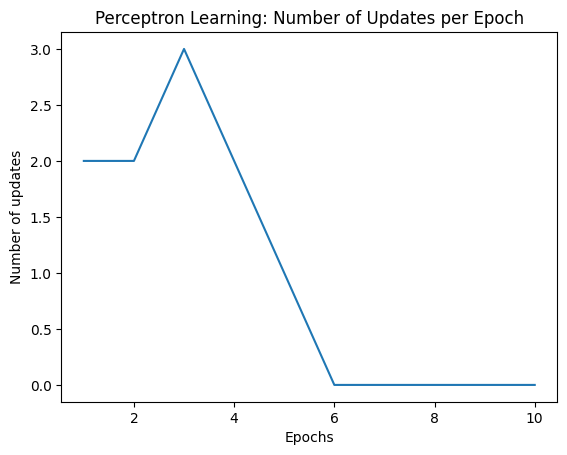

In [ ]:
# Plot the number of updates per epoch
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Perceptron Learning: Number of Updates per Epoch')
plt.show()

1. plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_):

  - Membuat plot garis menggunakan fungsi plot dari Matplotlib.
  - range(1, len(ppn.errors_)+1): Menghasilkan urutan angka dari 1 hingga jumlah epoch (iterasi pelatihan). Ini akan digunakan sebagai nilai sumbu x, yang merepresentasikan epoch.
  - ppn.errors_: Atribut dari objek ppn (model Perceptron) yang menyimpan jumlah pembaruan (misklasifikasi) yang dilakukan pada setiap epoch. Ini akan digunakan sebagai nilai sumbu y.

2. plt.xlabel('Epochs'):

  - Memberi label pada sumbu x dengan 'Epochs'.

3. plt.ylabel('Number of updates'):

  - Memberi label pada sumbu y dengan 'Number of updates'.

4. plt.title('Perceptron Learning: Number of Updates per Epoch'):

  - Memberi judul pada plot.

5. plt.show():

  - Menampilkan plot yang telah dibuat.

<ipython-input-52-705a6318256b>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


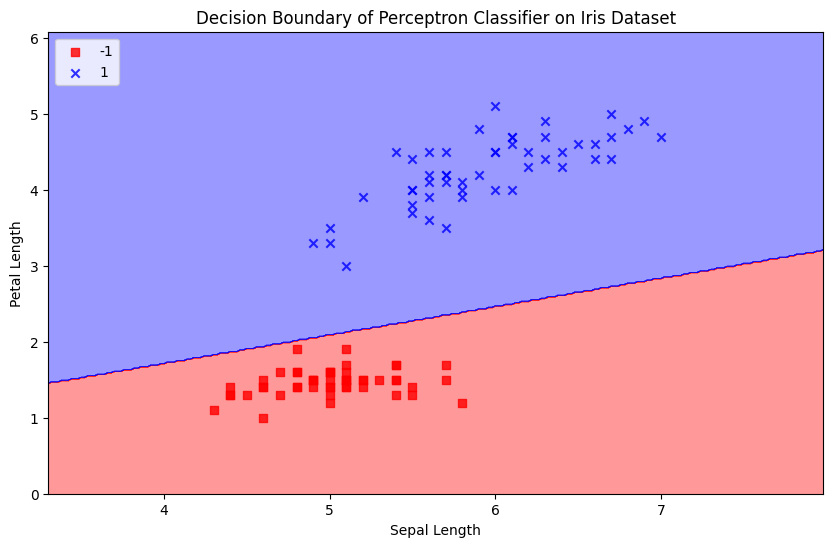

In [ ]:
from matplotlib.colors import ListedColormap

# Function to plot decision regions
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'green', 'black', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision regions by creating a pair of grid arrays xx1 and xx2
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # Use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # Draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

# Plot decision regions
plt.figure(figsize=(10, 6))
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Decision Boundary of Perceptron Classifier on Iris Dataset')
plt.legend(loc='upper left')
plt.show()


1. from matplotlib.colors import ListedColormap
  - Ini mengimpor ListedColormap dari matplotlib.colors, yang akan digunakan untuk membuat peta warna khusus untuk plot.

2. def plot_decision_regions(X, y, classifier, resolution=0.02):
  - Parameter:
    - X: Fitur (input) dari dataset yang ingin dipetakan.
    - y: Label target untuk setiap sampel di X.
    - classifier: Model klasifikasi yang telah dilatih (dalam hal ini, objek Perceptron).
    - resolution: Resolusi grid untuk pembuatan plot, semakin kecil nilainya, semakin halus plotnya.

3. markers = ('s', 'x', 'o', '^', 'v')

  colors = ('red', 'blue', 'green', 'black', 'grey')

  cmap = ListedColormap(colors[:len(np.unique(y))])

  - markers: Menentukan simbol yang akan digunakan untuk setiap kelas dalam plot.
  - colors: Mendefinisikan warna yang akan digunakan untuk setiap kelas.
  - cmap: Membuat peta warna menggunakan ListedColormap, yang membatasi warna hanya pada jumlah unik kelas dalam y.

4. x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

  - x1_min, x1_max, x2_min, x2_max: Menghitung rentang dari dua fitur (sumbu X dan Y) dengan menambahkan sedikit padding untuk memperluas area plot.
  - np.meshgrid: Membuat dua array grid 2D (xx1 dan xx2) berdasarkan rentang yang telah ditentukan. Ini akan digunakan untuk menghasilkan prediksi untuk setiap titik dalam grid.

5. Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

  Z = Z.reshape(xx1.shape)

  - np.array([xx1.ravel(), xx2.ravel()]).T: Mengubah grid 2D menjadi format yang bisa digunakan untuk prediksi dengan model (setiap titik dalam grid akan di-predict).
  - Z.reshape(xx1.shape): Mengubah hasil prediksi kembali ke bentuk grid untuk di-plot.

6. plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

  plt.xlim(xx1.min(), xx1.max())
  
  plt.ylim(xx2.min(), xx2.max())

  - plt.contourf: Menggambar kontur yang menunjukkan daerah keputusan berdasarkan prediksi dari model.
  - alpha=0.4: Menentukan transparansi dari kontur yang digambar.
  - cmap: Menentukan peta warna yang digunakan untuk menggambar kontur.

7. for i, cl in enumerate(np.unique(y)):
    
    plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

  - Menggambar titik data asli dari dataset. Untuk setiap kelas dalam y, titik-titik tersebut akan dipetakan menggunakan warna dan simbol yang sesuai dari peta warna dan simbol yang telah ditentukan sebelumnya.

8. plt.figure(figsize=(10, 6))
  
  plot_decision_regions(X, y, classifier=ppn)
  
  plt.xlabel('Sepal Length')
  
  plt.ylabel('Petal Length')
  
  plt.title('Decision Boundary of Perceptron Classifier on Iris Dataset')
  
  plt.legend(loc='upper left')
  
  plt.show()
  
  - plt.figure(figsize=(10, 6)): Mengatur ukuran figure untuk plot.
  - Memanggil plot_decision_regions: Menggambar daerah keputusan berdasarkan model ppn (Perceptron).
  - Menambahkan label pada sumbu X dan Y serta judul untuk plot.
  - plt.legend: Menampilkan legenda untuk menunjukkan simbol dan warna yang terkait dengan setiap kelas.
  - plt.show(): Menampilkan plot yang telah dibuat.

# PRAKTIKUM 2

**Klasifikasi Berita dengan Perceptron**

**Deskripsi**

Dalam kasus ini, Anda akan melakukan klasifiaksi berita berdasarkan 3 kategori, yaitu **Sport Hockey, Sport Baseball, dan Otomotif**. Proses klasifikasi akan menggunakan model Perceptron.

**Langkah 1 - Import Library**

In [ ]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

1. from sklearn.datasets import fetch_20newsgroups:

  - Mengimpor fungsi fetch_20newsgroups untuk mengunduh dataset 20 Newsgroups. Dataset ini berisi sekitar 20.000 dokumen teks dari 20 grup berita yang berbeda.

2. from sklearn.feature_extraction.text import TfidfVectorizer:

  - Mengimpor kelas TfidfVectorizer untuk mengubah teks menjadi representasi numerik menggunakan metode TF-IDF (Term Frequency-Inverse Document Frequency). TF-IDF adalah teknik yang umum digunakan dalam pemrosesan teks untuk menghitung bobot kata berdasarkan seberapa penting kata tersebut dalam suatu dokumen dan dalam keseluruhan koleksi dokumen.

3. from sklearn.linear_model import Perceptron:

  - Mengimpor kelas Perceptron untuk membuat model Perceptron. Model ini akan digunakan untuk klasifikasi teks.

4. from sklearn.metrics import f1_score, classification_report:

  - Mengimpor fungsi f1_score dan classification_report untuk mengevaluasi kinerja model klasifikasi.
    - f1_score: Mengukur keseimbangan antara presisi dan recall.
    - classification_report: Memberikan laporan yang lebih rinci tentang kinerja model, termasuk presisi, recall, F1-score, dan support untuk setiap kelas.

**Langkah 2 - Pilih Label dan Split Data**

In [ ]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

Kode ini mempersiapkan data training dan testing dari dataset 20 Newsgroups untuk klasifikasi teks.

1. categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']:

  - Mendeklarasikan list categories yang berisi nama-nama kategori (grup berita) yang akan digunakan dalam klasifikasi. Dalam kasus ini, hanya tiga kategori yang dipilih: 'rec.sport.hockey', 'rec.sport.baseball', dan 'rec.autos'.

2. newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes')):

  - Mengunduh data training dari dataset 20 Newsgroups menggunakan fungsi fetch_20newsgroups.
  - subset='train': Menentukan bahwa data yang diunduh adalah data training.
  - categories=categories: Membatasi data yang diunduh hanya untuk kategori yang telah ditentukan dalam list categories.
  - remove=('headers', 'footers', 'quotes'): Menghapus header, footer, dan kutipan dari dokumen teks, karena bagian-bagian ini biasanya tidak relevan untuk klasifikasi teks.
  - Data training yang diunduh disimpan dalam variabel newsgroups_train.

3. newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes')):

  - Mengunduh data testing dengan cara yang sama seperti data training, tetapi menggunakan subset='test' untuk menentukan bahwa data yang diunduh adalah data testing.
  - Data testing yang diunduh disimpan dalam variabel newsgroups_test.

**Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron**

In [ ]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



1. vectorizer = TfidfVectorizer():

  - Membuat instance dari kelas TfidfVectorizer untuk mengekstrak fitur menggunakan metode TF-IDF.

2. X_train = vectorizer.fit_transform(newsgroups_train.data):

  - Melakukan "fitting" dan transformasi pada data training (newsgroups_train.data) menggunakan TfidfVectorizer.
  - fit_transform(): Mempelajari vocabulary dan IDF dari data training, kemudian mengubah data training menjadi representasi numerik menggunakan TF-IDF.
  - Hasil transformasi disimpan dalam variabel X_train.

3. X_test = vectorizer.transform(newsgroups_test.data):

  - Melakukan transformasi pada data testing (newsgroups_test.data) menggunakan TfidfVectorizer yang telah difitting pada data training.
  - transform(): Mengubah data testing menjadi representasi numerik menggunakan vocabulary dan IDF yang dipelajari dari data training.
  - Hasil transformasi disimpan dalam variabel X_test.

4. clf = Perceptron(random_state=11):

  - Membuat instance dari kelas Perceptron dengan random_state=11 untuk memastikan reproduksibilitas hasil.

5. clf.fit(X_train, newsgroups_train.target):

  - Melatih model Perceptron (clf) menggunakan data training yang telah ditransformasi (X_train) dan label target (newsgroups_train.target).

6. predictions = clf.predict(X_test):

  - Melakukan prediksi pada data testing (X_test) menggunakan model Perceptron yang telah dilatih.
  - Hasil prediksi disimpan dalam variabel predictions.

7. print(classification_report(newsgroups_test.target, predictions)):

  - Mencetak laporan klasifikasi yang membandingkan label target sebenarnya (newsgroups_test.target) dengan hasil prediksi (predictions).
  - Laporan klasifikasi memberikan informasi tentang presisi, recall, F1-score, dan support untuk setiap kelas.

**Penjelasan**

Dataset yang digunakan pada kode program diatas adalah 20newsgroup yang terdiri dari sekitar 20.000 dokumen. Scikit-learn bahkan menyediakan fungsi yang memberikan kemudahan untuk mengunduh dan membaca kumpulan dataset dengan menggunakan sklearn.datasets. pada kode program diatas Perceptron mampu melakukan klasifikasi multikelas; strategi yang digunakan adalah one-versus-all untuk melakukan pelatihan untuk setiap kelas dalam data training. Dokumen teks memerlukan ekstraksi fitur salah satunya adalah bobot tf-idf pada kodeprogram diatas digunakan tfidf-vectorizer.

# PRAKTIKUM 3

Nilai Logika XOR dengan MLP

**Deskripsi**

Pada kasus sederhana ini, Anda akan menggunakan MLP untuk mendapatkan nilai biner yang dioperasikan dengan logika XOR. Perlu diingat bahwa nilai XOR berbeda dengan OR, XOR hanya akan bernilai benar jika salah satu nilai yang benar, bukan keduanya atau tidak sama sekali.

**Langkah 1 - Import Library**

In [ ]:
from sklearn.neural_network import MLPClassifier

MLPClassifier dari modul sklearn.neural_network.

- MLPClassifier: Merupakan kelas dalam scikit-learn yang mengimplementasikan Multi-layer Perceptron (MLP) classifier, yaitu jenis jaringan saraf tiruan yang digunakan untuk tugas klasifikasi.
    - MLP terdiri dari beberapa lapisan neuron (perceptron) yang saling terhubung, dan dapat digunakan untuk mempelajari pola kompleks dalam data.

**Langah 2 - Buat Data**

In [ ]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

1. y = [0, 1, 1, 0]:

  - y adalah list yang berisi label untuk setiap titik data.
  - Label dalam list ini adalah 0 atau 1, yang menunjukkan dua kelas yang berbeda.
  - Setiap elemen dalam list y sesuai dengan satu titik data dalam list X.

2. X = [[0, 0], [0, 1], [1, 0], [1, 1]]:

  - X adalah list of lists yang berisi data untuk setiap titik data.
  - Setiap sub-list dalam X merepresentasikan satu titik data, dan elemen-elemen dalam sub-list tersebut merepresentasikan fitur-fitur dari titik data tersebut.
  - Dalam kasus ini, setiap titik data memiliki dua fitur, dan nilai fitur-fitur tersebut adalah 0 atau 1.

**Langkah 3 - Fit Model**

In [ ]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

1. clf = MLPClassifier(...):

  - Membuat instance dari kelas MLPClassifier dengan beberapa parameter yang dikonfigurasi:
    - solver='lbfgs': Menentukan algoritma optimasi yang digunakan untuk melatih model. 'lbfgs' adalah algoritma optimasi yang cocok untuk dataset kecil.
    - activation='logistic': Menentukan fungsi aktivasi yang digunakan pada neuron-neuron di hidden layer. 'logistic' adalah fungsi sigmoid.
    - hidden_layer_sizes=(2,): Menentukan arsitektur jaringan saraf, dalam hal ini satu hidden layer dengan 2 neuron.
    - max_iter=100: Menentukan jumlah maksimum iterasi (epoch) untuk pelatihan model.
    - random_state=20: Menentukan seed untuk generator angka acak, sehingga hasil pelatihan dapat direproduksi.

2. Instance dari MLPClassifier disimpan dalam variabel clf.
clf.fit(X, y):

  - Melatih model MLP Classifier (clf) menggunakan data input X dan label target y yang telah didefinisikan sebelumnya.
  - Metode fit() akan menyesuaikan bobot dan bias model agar dapat mempelajari pola dalam data dan melakukan klasifikasi dengan benar.

**Langkah 4 - Prediksi**

In [ ]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


1. pred = clf.predict(X):

  - Melakukan prediksi pada data input X menggunakan model MLP Classifier (clf) yang telah dilatih.
  - Hasil prediksi disimpan dalam variabel pred.

2. print('Accuracy: %s' % clf.score(X, y)):

  - Mencetak akurasi model pada data training (X, y).
  - clf.score(X, y) menghitung akurasi model dengan membandingkan label target sebenarnya (y) dengan hasil prediksi (pred) pada data training.

3. for i,p in enumerate(pred[:10]): ...:

  - Melakukan iterasi melalui 10 prediksi pertama dalam variabel pred.
  - enumerate() digunakan untuk mendapatkan indeks (i) dan nilai (p) dari setiap prediksi.
  - Untuk setiap prediksi, kode mencetak label target sebenarnya (y[i]) dan label yang diprediksi (p).

# PRAKTIKUM 4

Klasifikasi dengan ANN

**Deskripsi**

Pada praktikum kali ini, Anda diminta untuk membuat model ANN untuk mengklasifikasi potensi seorang customer akan meninggalkan perusahaan Anda atau tidak. Istirlah populer dari fenomena ini disebut sebagai 'churn'. Tingkat churn yang tinggi (chrun rate) akan berdampak tidak baik bagi perusahaan.

⚠️ Perhatian! ⚠️

Pada praktikum ini, Anda akan menggunakan library tensorflow dari google. Oleh karena itu, Anda diharuskan untuk menginstal tensorflow terlebih dahulu.

Anda juga perlu menyesuaikan instalasi tensorflow yang Anda gunakan pada komputer lokal, apakah komputasi pada,

- CPU
- GPU (GPU support CUDA)
- Apple Silicon (M1/M2)

Panduan instalasi,

https://www.tensorflow.org/install

https://developer.apple.com/metal/tensorflow-plugin/

https://caffeinedev.medium.com/how-to-install-tensorflow-on-m1-mac-8e9b91d93706

**Pra Pengolahan Data**

**Langkah 1 - Import Library**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

**Langkah 2 - Load Data**

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/machine learning/js9/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

Cek data (X)

In [3]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


**Langkah 3 - Encoding Data Kategorikal**

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

1. from sklearn.preprocessing import LabelEncoder: Mengimpor kelas LabelEncoder dari modul sklearn.preprocessing. Kelas ini digunakan untuk mengubah label kategorikal menjadi representasi numerik.
2. le = LabelEncoder(): Membuat objek LabelEncoder dan menyimpannya dalam variabel le.
3. X[:, 2] = le.fit_transform(X[:, 2]):
  - X[:, 2]: Mengacu pada semua baris (:) dan kolom ketiga (2) dari dataset X.
  - le.fit_transform(): Metode ini melakukan dua hal:
    - fit(): Mempelajari label unik yang ada pada kolom ketiga dari X.
    - transform(): Mengubah label-label tersebut menjadi representasi numerik, biasanya dimulai dari 0 hingga jumlah label unik dikurangi 1.
  - Hasil dari fit_transform() kemudian disimpan kembali ke kolom ketiga dari X, sehingga menggantikan label kategorikal dengan nilai numerik.

In [5]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


**Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder**

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

1. from sklearn.compose import ColumnTransformer: Mengimpor kelas ColumnTransformer yang digunakan untuk menerapkan transformer (dalam hal ini OneHotEncoder) pada kolom tertentu dari dataset.
2. from sklearn.preprocessing import OneHotEncoder: Mengimpor kelas OneHotEncoder yang digunakan untuk melakukan one-hot encoding.
3. ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough'): Membuat objek ColumnTransformer dengan konfigurasi sebagai berikut:
  - transformers=[('encoder', OneHotEncoder(), [1])]: Menentukan transformer yang akan digunakan.
    - 'encoder' adalah nama transformer (bebas).
    - OneHotEncoder() adalah objek OneHotEncoder yang akan digunakan.
    - [1] adalah daftar indeks kolom yang akan di-encode .
  - remainder='passthrough' : Menentukan apa yang harus dilakukan dengan kolom lain yang tidak di-encode. 'passthrough' berarti kolom-kolom tersebut akan dibiarkan apa adanya.
4. X = np.array(ct.fit_transform(X)): Melakukan fitting dan transformasi pada dataset X menggunakan ColumnTransformer yang telah dibuat:
  - fit_transform(X): Mempelajari kategori unik pada kolom yang ditentukan dan melakukan one-hot encoding pada dataset X.
  - np.array(): Mengubah hasil transformasi menjadi array NumPy dan menyimpannya kembali ke variabel X.

In [7]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


**Langkah 5 - Split Data**

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

1. from sklearn.model_selection import train_test_split: Mengimpor fungsi train_test_split dari modul sklearn.model_selection. Fungsi ini digunakan untuk membagi dataset menjadi data training dan data testing.
2. X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0): Memanggil fungsi train_test_split dengan parameter berikut:
  - X: Dataset fitur (input).
  - y: Dataset target (output).
  - test_size = 0.2: Menentukan proporsi data yang akan digunakan sebagai data testing. Dalam hal ini, 20% dari data akan digunakan sebagai data testing.
  - random_state = 0: Menentukan seed untuk generator angka acak. Dengan menetapkan random_state, pembagian data akan konsisten setiap kali kode dijalankan, sehingga hasil eksperimen dapat direproduksi.

**Langkah 6 - Scaling Fitur**

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

1. from sklearn.preprocessing import StandardScaler: Mengimpor kelas StandardScaler dari modul sklearn.preprocessing. StandardScaler digunakan untuk melakukan standardisasi data dengan mengubah setiap fitur agar memiliki rata-rata 0 dan deviasi standar 1.
2. sc = StandardScaler(): Membuat objek StandardScaler dan menyimpannya dalam variabel sc.
3. X_train = sc.fit_transform(X_train): Melakukan fitting dan transformasi pada data training (X_train):
  - fit(): Menghitung rata-rata dan deviasi standar dari setiap fitur dalam X_train.
  - transform(): Mengubah data X_train dengan mengurangkan rata-rata dan membagi dengan deviasi standar dari setiap fitur. Hasilnya disimpan kembali ke X_train.
4. X_test = sc.transform(X_test): Melakukan transformasi pada data testing (X_test) menggunakan rata-rata dan deviasi standar yang telah dihitung dari data training:
  - transform(): Mengubah data X_test dengan mengurangkan rata-rata dan membagi dengan deviasi standar yang dihitung dari X_train. Hasilnya disimpan kembali ke X_test.

**Membuat Model ANN**

**Langkah 1 - Inisiasi Model ANN**

In [10]:
ann = tf.keras.models.Sequential()

1. ann = tf.keras.models.Sequential(): Membuat objek model Sequential dan menyimpannya dalam variabel ann. Objek ini merepresentasikan model ANN yang akan dibangun.

**Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama**

In [11]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

- ann.add(): Metode ini digunakan untuk menambahkan lapisan ke model Sequential.
- tf.keras.layers.Dense(): Kelas ini merepresentasikan lapisan Dense.
- units=6: Parameter ini menentukan jumlah neuron (unit) di lapisan tersebut. Dalam hal ini, lapisan tersebut memiliki 6 neuron.
- activation='relu': Parameter ini menentukan fungsi aktivasi yang akan digunakan oleh neuron di lapisan tersebut. Dalam hal ini, fungsi aktivasi ReLU (Rectified Linear Unit) digunakan.

**Langkah 3 - Membuat Hidden Layer Kedua**

In [12]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

- ann.add(): Digunakan untuk menambahkan lapisan baru ke model.
- tf.keras.layers.Dense(): Mendefinisikan lapisan sebagai lapisan Dense (fully connected).
- units=6: Menentukan jumlah neuron di lapisan ini adalah 6.
- activation='relu': Menggunakan fungsi aktivasi ReLU untuk lapisan ini.

**Langkah 4 - Membuat Output Layer**

In [13]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

- ann.add(): Digunakan untuk menambahkan lapisan ke model.
- tf.keras.layers.Dense(): Mendefinisikan lapisan sebagai lapisan Dense (fully connected).
- units=1: Menentukan jumlah neuron di lapisan ini adalah 1. Karena ini adalah lapisan output untuk masalah klasifikasi biner (churn prediction), hanya dibutuhkan satu neuron untuk menghasilkan output berupa probabilitas.
- activation='sigmoid': Menggunakan fungsi aktivasi sigmoid untuk lapisan ini. Fungsi aktivasi sigmoid menghasilkan output dalam rentang 0 hingga 1, yang ideal untuk masalah klasifikasi biner.

**Training Model**

**Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN**

In [14]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

- ann.compile(): Metode ini digunakan untuk mengkompilasi model.
- optimizer = 'adam': Menentukan algoritma optimasi yang akan digunakan untuk memperbarui bobot (weights) model selama training. 'adam' adalah algoritma optimasi yang populer dan efisien yang sering digunakan dalam deep learning.
- loss = 'binary_crossentropy': Menentukan loss function yang akan digunakan untuk mengukur kesalahan prediksi model. 'binary_crossentropy' adalah loss function yang umum digunakan untuk masalah klasifikasi biner.
- `metrics = ['accuracy']: Menentukan metrik yang akan digunakan untuk mengevaluasi kinerja model selama training dan testing. 'accuracy' adalah metrik yang umum digunakan untuk mengukur proporsi prediksi yang benar.

**Langkah 2 - Fitting Model**

In [15]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6767 - loss: 0.5990
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7953 - loss: 0.4703
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8061 - loss: 0.4353
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8023 - loss: 0.4327
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8072 - loss: 0.4198
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8222 - loss: 0.4053
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8305 - loss: 0.4046
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8344 - loss: 0.3881
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8456 - loss: 0.3744
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8434 - loss: 0.3646
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8408 - loss: 0.3723
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

- ann.fit(): Metode ini digunakan untuk melatih model.
- X_train: Dataset fitur (input) untuk training.
- y_train: Dataset target (output) untuk training.
- batch_size = 32: Menentukan jumlah sampel data yang akan diproses sebelum bobot model diperbarui. Batch size yang lebih kecil membutuhkan lebih banyak iterasi tetapi dapat meningkatkan kinerja model.
- epochs = 100: Menentukan jumlah iterasi model akan dilatih pada seluruh dataset training. Epoch yang lebih banyak dapat meningkatkan kinerja model, tetapi juga dapat menyebabkan overfitting jika terlalu besar.

**Membuat Prediksi**

Diberikan informasi sebagai berikut,

- Geography: France
- Credit Score: 600
- Gender: Male
- Age: 40 years old
- Tenure: 3 years
- Balance: 60000
- Number of Products: 2
- Does this customer have a credit card ? Yes
- Is this customer an Active Member: Yes
- Estimated Salary: $ 50000

Apakah customer tersebut perlu dipertahankan?

**Modelkan Data Baru dan Buat Prediksi**

In [16]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[False]]


- ann.predict(): Metode ini digunakan untuk membuat prediksi menggunakan model ANN yang telah dilatih.
- sc.transform(): Metode ini digunakan untuk mentransformasi data baru menggunakan StandardScaler (sc) yang telah difit pada data training. Transformasi ini penting untuk memastikan bahwa data baru memiliki skala yang sama dengan data training.
- [[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]: Data baru yang akan diprediksi, direpresentasikan sebagai list of lists. Data ini harus memiliki format dan fitur yang sama dengan data training.
- > 0.5: Membandingkan hasil prediksi (probabilitas) dengan 0.5. Jika probabilitas lebih besar dari 0.5, maka prediksi dianggap sebagai kelas positif (True), jika tidak, dianggap sebagai kelas negatif (False).
- print(): Menampilkan hasil prediksi (True atau False).

Apakah hasilnya **False**?

Hasil false, yang artinya model memprediksi customer tidak akan churn (tetap menjadi customer)

**Prediksi Dengan Data Testing**

In [17]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


1. y_pred = ann.predict(X_test): Model ANN (ann) digunakan untuk memprediksi target pada data testing (X_test). Hasil prediksi, yang berupa probabilitas, disimpan dalam variabel y_pred.
2. y_pred = (y_pred > 0.5): Hasil prediksi diubah menjadi nilai biner (0 atau 1) berdasarkan ambang batas 0.5. Jika probabilitas lebih besar dari 0.5, maka prediksi dianggap sebagai kelas positif (1), jika tidak, dianggap sebagai kelas negatif (0).
3. y_pred.reshape(len(y_pred),1): Hasil prediksi y_pred, yang awalnya berupa array 1 dimensi, diubah bentuknya menjadi array 2 dimensi dengan 1 kolom. Hal ini dilakukan agar dapat digabungkan dengan y_test yang juga akan diubah bentuknya.
4. y_test.reshape(len(y_test),1): Target sebenarnya y_test diubah bentuknya menjadi array 2 dimensi dengan 1 kolom, sama seperti y_pred.
5. np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1): Hasil prediksi y_pred dan target sebenarnya y_test digabungkan secara horizontal (axis=1) menggunakan fungsi np.concatenate.
6. print(): Menampilkan array yang berisi hasil prediksi dan target sebenarnya secara berdampingan.

**Cek Akurasi dan Confusion Matrix**

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1499   96]
 [ 189  216]]


0.8575

1. from sklearn.metrics import confusion_matrix, accuracy_score: Mengimpor fungsi confusion_matrix dan accuracy_score dari modul sklearn.metrics. Fungsi-fungsi ini digunakan untuk menghitung confusion matrix dan accuracy score.
2. cm = confusion_matrix(y_test, y_pred): Menghitung confusion matrix dengan membandingkan target sebenarnya (y_test) dan hasil prediksi (y_pred). Hasilnya disimpan dalam variabel cm.
3. print(cm): Menampilkan confusion matrix.
4. accuracy_score(y_test, y_pred): Menghitung accuracy score dengan membandingkan target sebenarnya (y_test) dan hasil prediksi (y_pred). Hasilnya (nilai accuracy) akan ditampilkan.

# TUGAS

- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN

- Anda diperbolehkan melakukan eksplorasi terhadap,
  - Metode pra pengolahan
  - Pemilihan fitur
  - Arsitektur ANN
  - Fungsi Aktiviasi

- ANN diimplementasikan dengan menggunakan tensorflow.

- DIKERJAKAN SECARA BERKELOMPOK

- JELASKAN HASIL YANG ANDA DAPATKAN,
  - AKURASI
  - CONFUSION MATRIX
  - KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt

In [20]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


1. tf.keras.datasets.mnist.load_data(): Fungsi ini mengambil dataset MNIST dari server TensorFlow dan memuatnya ke dalam memori.

2. (X_train, y_train), (X_test, y_test): Dataset yang dimuat di-unpack menjadi empat array NumPy:

- X_train: Berisi gambar pelatihan. Ini adalah array 3D dengan bentuk (60000, 28, 28). Angka 60000 mewakili jumlah gambar pelatihan, dan 28x28 adalah resolusi setiap gambar dalam piksel.
- y_train: Menyimpan label yang sesuai (digit 0-9) untuk gambar pelatihan.
- X_test: Berisi gambar pengujian. Ini adalah array 3D dengan bentuk (10000, 28, 28). Angka 10000 mewakili jumlah gambar pengujian.
- y_test: Menyimpan label yang sesuai untuk gambar pengujian.

In [21]:
print(X_train.shape)
print(len(y_train))
print(X_test.shape)
print(len(y_test))


(60000, 28, 28)
60000
(10000, 28, 28)
10000


In [22]:
X_train, X_test = X_train / 255.0, X_test / 255.0 # normalisasi data citra menjadi citra  biner


- X_train / 255.0: Setiap nilai piksel dalam array X_train dibagi dengan 255.0.
- X_test / 255.0: Setiap nilai piksel dalam array X_test juga dibagi dengan 255.0.
- X_train, X_test = ...: Hasil dari operasi pembagian tersebut kemudian disimpan kembali ke variabel X_train dan X_test, sehingga data gambar yang ternormalisasi menggantikan data gambar asli.

In [23]:
model = Sequential([                  # inisiasi model
    Flatten(input_shape=(28, 28)),    # input layer
    Dense(128, activation='relu'),    # hidden layer 1
    Dense(128, activation='relu'),    # hidden layer 2
    Dropout(0.2),                     # layer untuk mencegah overfitting
    Dense(10)                         # output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1. model = Sequential(...): Membuat objek model Sequential. Ini adalah cara yang umum untuk membuat model JST di Keras, di mana lapisan ditambahkan secara berurutan.
2. Flatten(input_shape=(28, 28)): Lapisan pertama adalah Flatten. Ini mengubah gambar input 28x28 piksel menjadi vektor 1D dengan 784 elemen (28 * 28). Ini diperlukan karena lapisan Dense berikutnya mengharapkan input dalam bentuk vektor.
3. Dense(128, activation='relu'): Lapisan kedua adalah Dense dengan 128 neuron dan fungsi aktivasi ReLU (relu). Lapisan ini terhubung sepenuhnya ke lapisan sebelumnya, dan setiap neuron melakukan operasi linier diikuti oleh fungsi aktivasi ReLU.
4. Dense(128, activation='relu'): Lapisan ketiga mirip dengan lapisan kedua, juga merupakan Dense dengan 128 neuron dan fungsi aktivasi ReLU.
5. Dropout(0.2): Lapisan keempat adalah Dropout dengan rate 0.2. Ini secara acak menonaktifkan 20% neuron selama pelatihan untuk mencegah overfitting, di mana model terlalu fokus pada data training dan tidak dapat menggeneralisasi dengan baik pada data baru.
6. Dense(10): Lapisan terakhir adalah Dense dengan 10 neuron, yang sesuai dengan 10 kelas digit (0-9). Lapisan ini tidak memiliki fungsi aktivasi karena fungsi aktivasi akan diterapkan nanti selama proses kompilasi model.

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

1. model.compile(...): Metode ini digunakan untuk mengkompilasi model JST.
2. optimizer='adam': Menentukan algoritma optimasi yang akan digunakan untuk memperbarui bobot (weights) model selama pelatihan. 'adam' adalah algoritma optimasi yang populer dan efisien yang sering digunakan dalam deep learning.
3. loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True): Menentukan loss function yang akan digunakan untuk mengukur kesalahan prediksi model. SparseCategoricalCrossentropy adalah loss function yang umum digunakan untuk masalah klasifikasi multi-kelas di mana label target berupa integer (misalnya, 0, 1, 2, ...).
  - from_logits=True: Parameter ini menunjukkan bahwa output dari lapisan terakhir model (lapisan Dense dengan 10 neuron) adalah logits, bukan probabilitas. Logits adalah output mentah dari jaringan saraf sebelum fungsi aktivasi diterapkan. Dengan menetapkan from_logits=True, fungsi loss akan secara otomatis menerapkan fungsi softmax pada logits untuk mendapatkan probabilitas sebelum menghitung loss.
4. metrics=['accuracy']: Menentukan metrik yang akan digunakan untuk mengevaluasi kinerja model selama pelatihan dan pengujian. 'accuracy' adalah metrik yang umum digunakan untuk mengukur proporsi prediksi yang benar.

In [25]:
model.fit(X_train, y_train, epochs=100, batch_size=100)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8232 - loss: 0.5971
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9569 - loss: 0.1433
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9708 - loss: 0.0975
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9767 - loss: 0.0728
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9826 - loss: 0.0562
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9871 - loss: 0.0435
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9870 - loss: 0.0402
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9894 - loss: 0.0322
Epoch 9/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9916 - loss: 0.0257
Epoch 10/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9918 - loss: 0.0234
Epoch 11/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9943 - loss: 0.0174
Epoch 12/100
600/600 ━━━━━━━━━━━━━━━━━━━━

1. model.fit(...): Metode ini digunakan untuk melatih model JST.
2. X_train: Dataset fitur (input) untuk training, yang dalam kasus ini adalah gambar MNIST yang telah dinormalisasi.
3. y_train: Dataset target (output) untuk training, yang dalam kasus ini adalah label digit yang sesuai dengan gambar MNIST.
4. epochs=100: Menentukan jumlah iterasi model akan dilatih pada seluruh dataset training. Epoch yang lebih banyak dapat meningkatkan kinerja model, tetapi juga dapat menyebabkan overfitting jika terlalu besar.
5. batch_size=100: Menentukan jumlah sampel data yang akan diproses sebelum bobot model diperbarui. Batch size yang lebih kecil membutuhkan lebih banyak iterasi tetapi dapat meningkatkan kinerja model.

In [26]:
model.evaluate(X_test,  y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9787 - loss: 0.1877


[0.18769241869449615, 0.9786999821662903]

1. model.evaluate(...): Metode ini digunakan untuk mengevaluasi model JST.
2. X_test: Dataset fitur (input) untuk testing, yang dalam kasus ini adalah gambar MNIST yang telah dinormalisasi dan tidak digunakan selama pelatihan.
3. y_test: Dataset target (output) untuk testing, yang dalam kasus ini adalah label digit yang sesuai dengan gambar MNIST di X_test.
4. verbose=2: Menentukan tingkat verbositas selama evaluasi. verbose=2 akan menampilkan progres evaluasi, termasuk loss dan metrik yang dihitung.

In [27]:
y_pred = np.argmax(model.predict(X_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


1. model.predict(X_test): Bagian ini menggunakan model yang telah dilatih untuk membuat prediksi pada data uji (X_test). Output dari langkah ini adalah array 2D probabilitas, di mana setiap baris mewakili gambar uji, dan setiap kolom mewakili probabilitas gambar tersebut milik kelas tertentu (digit 0-9).

2. np.argmax(..., axis=1): Bagian ini menggunakan fungsi argmax dari NumPy (np) untuk menemukan indeks probabilitas tertinggi di setiap baris array prediksi.

3. axis=1 menentukan bahwa operasi argmax harus dilakukan di sepanjang setiap baris (sumbu 1). Ini berarti menemukan indeks kolom (mewakili kelas) dengan probabilitas tertinggi untuk setiap gambar uji.
y_pred = ...: Hasil dari operasi argmax, yang merupakan array label kelas yang diprediksi (digit 0-9), disimpan dalam variabel y_pred.

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 970    1    2    1    1    0    2    1    2    0]
 [   0 1125    2    1    0    0    2    1    4    0]
 [   1    7 1003    5    2    0    1    6    7    0]
 [   0    0    3  990    0    9    0    2    4    2]
 [   1    1    3    0  963    1    3    2    2    6]
 [   2    0    0   10    1  875    1    1    1    1]
 [   3    3    0    1    3    6  937    0    5    0]
 [   1    6    7    2    1    0    0 1004    6    1]
 [   3    0    3    5    1    4    0    3  953    2]
 [   0    4    0    4   13    6    0    8    7  967]]


0.9787

1. from sklearn.metrics import confusion_matrix, accuracy_score: Baris ini mengimpor fungsi confusion_matrix dan accuracy_score dari modul sklearn.metrics. Fungsi-fungsi ini digunakan untuk menghitung metrik evaluasi model.
2. cm = confusion_matrix(y_test, y_pred): Baris ini menghitung confusion matrix dengan membandingkan label sebenarnya (y_test) dengan label yang diprediksi oleh model (y_pred). Confusion matrix memberikan informasi tentang kinerja model dengan menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas.
3. print(cm): Baris ini menampilkan confusion matrix yang telah dihitung.
4. accuracy_score(y_test, y_pred): Baris ini menghitung skor akurasi model. Skor akurasi adalah persentase prediksi yang benar dari total prediksi.

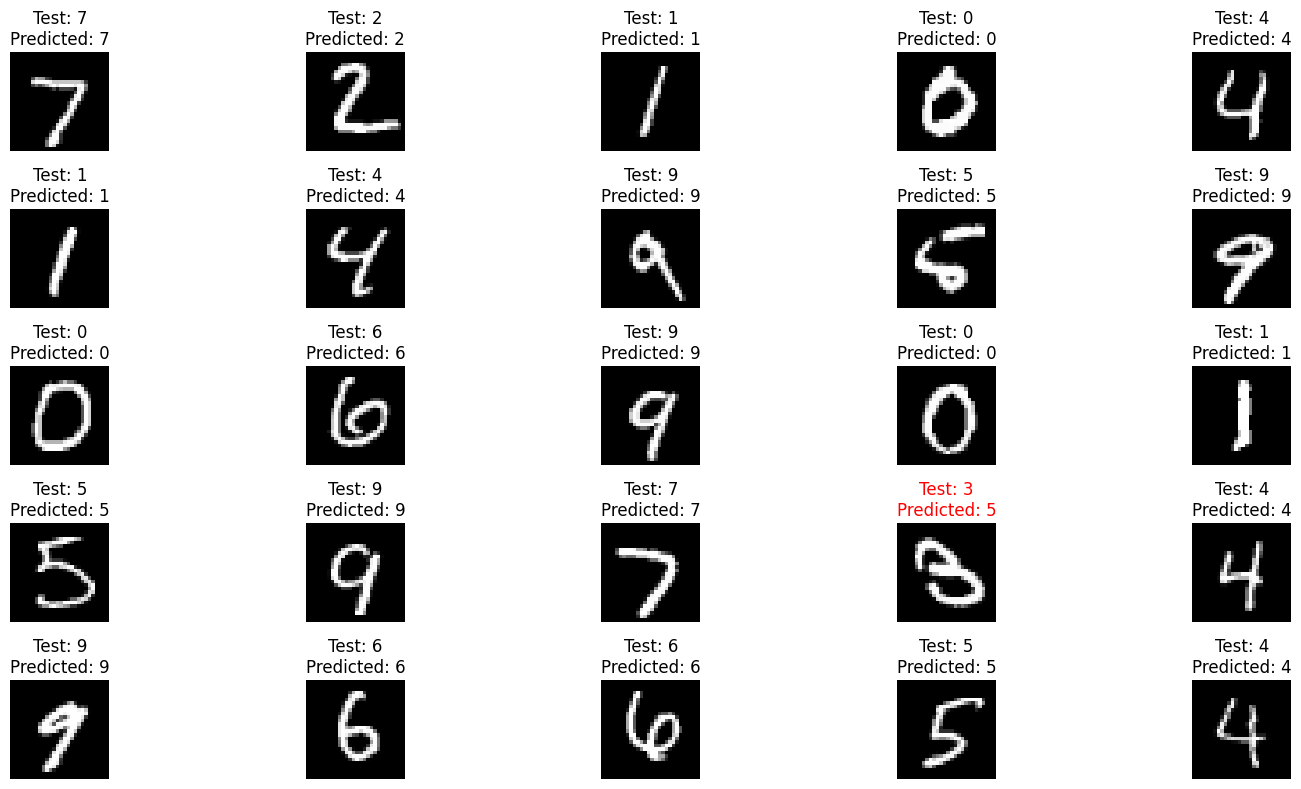

In [30]:
n_images = 25

sample_images = X_test[:n_images]
sample_labels = y_test[:n_images]

plt.figure(figsize=(16, 8))
for i in range(n_images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')

    plt.title(f"Test: {sample_labels[i]}\nPredicted: {y_pred[i]}",
              color='black'
              if sample_labels[i] == y_pred[i]
              else 'red')
    plt.axis('off')

plt.tight_layout()
plt.show()
